[26.04581105  4.85431235 10.33868093 -0.29137529]


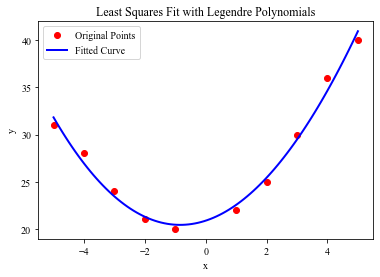

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.legendre import Legendre

# 定义数据点
x = np.array([-5, -4, -3, -2, -1, 1, 2, 3, 4, 5])
y = np.array([31, 28 ,24, 21, 20, 22, 25, 30, 36, 40])

# 将x标准化到[-1, 1]范围内，以便使用勒让德多项式
x_normalized = 2 * (x - np.min(x)) / (np.max(x) - np.min(x)) - 1

# 使用勒让德多项式进行拟合，设定多项式阶数为3
coefficients = np.polynomial.legendre.legfit(x_normalized, y, 3)

print(coefficients)
# 构建勒让德多项式
legendre_poly = Legendre(coefficients)

# 绘制原始点和拟合曲线
xx = np.linspace(-1, 1, 100)
yy = legendre_poly(xx)

# 将标准化后的xx转换回原始范围
xx_original = (xx + 1) * (np.max(x) - np.min(x)) / 2 + np.min(x)

plt.figure()
plt.plot(x, y, 'ro', label='Original Points', markerfacecolor='r')
plt.plot(xx_original, yy, 'b-', label='Fitted Curve', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Least Squares Fit with Legendre Polynomials')
plt.legend()
plt.show()


In [2]:
# 重新计算各个内积
y_y = np.sum(y**2)
y_phi_0 = np.sum(y)
y_phi_1 = np.sum(y * x)
y_phi_2 = np.sum(y * (x**2 - 11))
y_phi_3 = np.sum(y * (x**3 - (89/5) * x))

# 手动计算之前的系数
a_0_star = 277 / 10
a_1_star = 21 / 22
a_2_star = 464 / 748
a_3_star = 45 / 181984

# 计算误差
delta_squared = y_y - (a_0_star * y_phi_0 + a_1_star * y_phi_1 + a_2_star * y_phi_2 + a_3_star * y_phi_3)
delta_squared


6.052752148863874